In [19]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [20]:
SBUX_raw = pd.read_csv("C:\\Users\\SUKHJIT\\Documents\\AMS325-FinalProject\\AMS325-RawProjectData\\SBUX.csv", parse_dates=['Date'])
#parsed the date column into date format
print(SBUX_raw)

SBUX_proc = SBUX_raw.drop(columns=['Open','High','Low','Adj Close','Volume'])
SBUX_proc["Percent Change"] = SBUX_proc['Close'].pct_change()*100

start = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 1, 2))[0])[0]
end = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 12, 31))[0])[0]+1
SBUX_proc = SBUX_proc[start:end]

print(SBUX_proc)
#Left with Close and Percent Change of Close Columns from Jan 2 2015 to end of 2019

ave_SBUXoverall = SBUX_proc['Percent Change'].describe()['mean']
print('Overall average percent change:', ave_SBUXoverall)

           Date        Open        High        Low      Close  Adj Close  \
0    1992-06-26    0.328125    0.347656   0.320313   0.335938   0.264262   
1    1992-06-29    0.339844    0.367188   0.332031   0.359375   0.282698   
2    1992-06-30    0.367188    0.371094   0.343750   0.347656   0.273479   
3    1992-07-01    0.351563    0.359375   0.339844   0.355469   0.279625   
4    1992-07-02    0.359375    0.359375   0.347656   0.355469   0.279625   
...         ...         ...         ...        ...        ...        ...   
7914 2023-11-29  101.510002  101.690002  99.529999  99.849998  99.849998   
7915 2023-11-30  100.059998  100.120003  98.419998  99.300003  99.300003   
7916 2023-12-01   98.500000   99.279999  97.519997  99.199997  99.199997   
7917 2023-12-04   98.389999   98.879997  96.769997  97.599998  97.599998   
7918 2023-12-05   97.379997   97.480003  94.849998  95.540001  95.540001   

         Volume  
0     224358400  
1      58732800  
2      34777600  
3      18316800

In [21]:
#this stores the overall average during this time period
print(SBUX_proc)
ave_SBUX_overall = SBUX_proc['Percent Change'].describe()['mean']

#in this code, th15s correSBUXonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
th15s = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 11, 24))[0])[0]
th15e = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 11, 30))[0])[0]+1
th16s = (np.where(SBUX_proc['Date'] == datetime.datetime(2016, 11, 22))[0])[0]
th16e = (np.where(SBUX_proc['Date'] == datetime.datetime(2016, 11, 28))[0])[0]+1
th17s = (np.where(SBUX_proc['Date'] == datetime.datetime(2017, 11, 21))[0])[0]
th17e = (np.where(SBUX_proc['Date'] == datetime.datetime(2017, 11, 27))[0])[0]+1
th18s = (np.where(SBUX_proc['Date'] == datetime.datetime(2018, 11, 20))[0])[0]
th18e = (np.where(SBUX_proc['Date'] == datetime.datetime(2018, 11, 26))[0])[0]+1
th19s = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 11, 26))[0])[0]
th19e = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 12, 2))[0])[0]+1
print(th15s, th15e, th16s, th16e, th17s, th17e, th18s, th18e, th19s, th19e)

#This concatenates the 5 selected intervals into one dataframe, SBUX_th, which contains the thanksgivings for this stock, S&P 500
SBUX_th = pd.concat([SBUX_proc.iloc[th15s:th15e],SBUX_proc.iloc[th16s:th16e],SBUX_proc.iloc[th17s:th17e],SBUX_proc.iloc[th18s:th18e],SBUX_proc.iloc[th19s:th19e],], ignore_index=True)
print(SBUX_th)

#this line obtains the mean of the thanksgiving data
ave_SBUXth = SBUX_th['Percent Change'].describe()['mean']
print(ave_SBUXth, ave_SBUX_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.839, the answer is no signficant differents
statistic, pvalue_SBUXth = stats.ttest_ind(a=SBUX_proc['Percent Change'], b=SBUX_th['Percent Change'], equal_var=False)
print(pvalue_SBUXth)

           Date      Close  Percent Change
5672 2015-01-02  40.720001       -0.743452
5673 2015-01-05  39.939999       -1.915525
5674 2015-01-06  39.615002       -0.813713
5675 2015-01-07  40.590000        2.461184
5676 2015-01-08  41.244999        1.613695
...         ...        ...             ...
6925 2019-12-24  88.519997        0.328680
6926 2019-12-26  88.080002       -0.497057
6927 2019-12-27  88.129997        0.056761
6928 2019-12-30  87.440002       -0.782929
6929 2019-12-31  87.919998        0.548943

[1258 rows x 3 columns]
226 230 477 481 728 732 979 983 1234 1238
         Date      Close  Percent Change
0  2015-11-24  61.959999       -1.085568
1  2015-11-25  62.189999        0.371207
2  2015-11-27  62.180000       -0.016078
3  2015-11-30  61.389999       -1.270507
4  2016-11-22  57.119999        1.818184
5  2016-11-23  57.590000        0.822831
6  2016-11-25  57.430000       -0.277826
7  2016-11-28  57.590000        0.278600
8  2017-11-21  57.259998        0.792109
9  2017

In [22]:
#in this code, th15s correSBUXonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
va15s = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 2, 12))[0])[0]
va15e = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 2, 18))[0])[0]+1
va16s = (np.where(SBUX_proc['Date'] == datetime.datetime(2016, 2, 11))[0])[0]
va16e = (np.where(SBUX_proc['Date'] == datetime.datetime(2016, 2, 17))[0])[0]+1
va17s = (np.where(SBUX_proc['Date'] == datetime.datetime(2017, 2, 10))[0])[0]
va17e = (np.where(SBUX_proc['Date'] == datetime.datetime(2017, 2, 16))[0])[0]+1
va18s = (np.where(SBUX_proc['Date'] == datetime.datetime(2018, 2, 12))[0])[0]
va18e = (np.where(SBUX_proc['Date'] == datetime.datetime(2018, 2, 16))[0])[0]+1
va19s = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 2, 12))[0])[0]
va19e = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 2, 19))[0])[0]+1
print(va15s, va15e, va16s, va16e, va17s, va17e, va18s, va18e, va19s, va19e)

#This concatenates the 5 selected intervals into one dataframe, SBUX_va, which contains the thanksgivings for vais stock, S&P 500
SBUX_va = pd.concat([SBUX_proc.iloc[va15s:va15e],SBUX_proc.iloc[va16s:va16e],SBUX_proc.iloc[va17s:va17e],SBUX_proc.iloc[va18s:va18e],SBUX_proc.iloc[va19s:va19e],], ignore_index=True)
print(SBUX_va)

#this line obtains the mean of the thanksgiving data
ave_SBUXva = SBUX_va['Percent Change'].describe()['mean']
print(ave_SBUXva, ave_SBUX_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.0015, the answer is a signficant difference
#the valentines day performance is higher
statistic, pvalue_SBUXva = stats.ttest_ind(a=SBUX_proc['Percent Change'], b=SBUX_va['Percent Change'], equal_var=False)
print(pvalue_SBUXva)

28 32 279 283 531 536 783 788 1034 1039
         Date      Close  Percent Change
0  2015-02-12  45.915001        1.145503
1  2015-02-13  45.790001       -0.272242
2  2015-02-17  46.014999        0.491369
3  2015-02-18  46.500000        1.054006
4  2016-02-11  54.919998       -0.398986
5  2016-02-12  55.860001        1.711586
6  2016-02-16  56.410000        0.984603
7  2016-02-17  57.630001        2.162739
8  2017-02-10  56.220001        0.734635
9  2017-02-13  56.110001       -0.195660
10 2017-02-14  56.580002        0.837642
11 2017-02-15  56.860001        0.494873
12 2017-02-16  56.730000       -0.228633
13 2018-02-12  55.380001        1.465736
14 2018-02-13  55.669998        0.523649
15 2018-02-14  55.990002        0.574823
16 2018-02-15  56.580002        1.053760
17 2018-02-16  56.480000       -0.176744
18 2019-02-12  69.750000       -0.342903
19 2019-02-13  70.510002        1.089609
20 2019-02-14  70.839996        0.468010
21 2019-02-15  70.709999       -0.183508
22 2019-02-19  70

In [23]:
#in this code, th15s correSBUXonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
fj15s = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 7, 1))[0])[0]
fj15e = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 7, 7))[0])[0]+1
fj16s = (np.where(SBUX_proc['Date'] == datetime.datetime(2016, 6, 30))[0])[0]
fj16e = (np.where(SBUX_proc['Date'] == datetime.datetime(2016, 7, 6))[0])[0]+1
fj17s = (np.where(SBUX_proc['Date'] == datetime.datetime(2017, 6, 30))[0])[0]
fj17e = (np.where(SBUX_proc['Date'] == datetime.datetime(2017, 7, 6))[0])[0]+1
fj18s = (np.where(SBUX_proc['Date'] == datetime.datetime(2018, 7, 2))[0])[0]
fj18e = (np.where(SBUX_proc['Date'] == datetime.datetime(2018, 7, 6))[0])[0]+1
fj19s = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 7, 2))[0])[0]
fj19e = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 7, 8))[0])[0]+1
print(fj15s, fj15e, fj16s, fj16e, fj17s, fj17e, fj18s, fj18e, fj19s, fj19e)

#This concatenates the 5 selected intervals into one dataframe, SBUX_fj, which contains the thanksgivings for vais stock, S&P 500
SBUX_fj = pd.concat([SBUX_proc.iloc[fj15s:fj15e],SBUX_proc.iloc[fj16s:fj16e],SBUX_proc.iloc[fj17s:fj17e],SBUX_proc.iloc[fj18s:fj18e],SBUX_proc.iloc[fj19s:fj19e],], ignore_index=True)
print(SBUX_fj)

#this line obtains the mean of the thanksgiving data
ave_SBUXfj = SBUX_fj['Percent Change'].describe()['mean']
print(ave_SBUXfj, ave_SBUX_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.207, the conclusion is that the differences are insignificant
statistic, pvalue_SBUXfj = stats.ttest_ind(a=SBUX_proc['Percent Change'], b=SBUX_fj['Percent Change'], equal_var=False)
print(pvalue_SBUXfj)

124 128 376 380 628 632 880 884 1131 1135
         Date      Close  Percent Change
0  2015-07-01  53.889999        0.503543
1  2015-07-02  54.240002        0.649477
2  2015-07-06  54.310001        0.129054
3  2015-07-07  54.380001        0.128890
4  2016-06-30  57.119999        0.669716
5  2016-07-01  56.990002       -0.227586
6  2016-07-05  56.770000       -0.386036
7  2016-07-06  56.750000       -0.035230
8  2017-06-30  58.310001       -0.085675
9  2017-07-03  58.250000       -0.102900
10 2017-07-05  57.939999       -0.532191
11 2017-07-06  57.599998       -0.586816
12 2018-07-02  49.060001        0.429894
13 2018-07-03  48.770000       -0.591115
14 2018-07-05  48.610001       -0.328068
15 2018-07-06  48.980000        0.761158
16 2019-07-02  85.510002        1.135422
17 2019-07-03  87.790001        2.666354
18 2019-07-05  87.790001        0.000000
19 2019-07-08  87.440002       -0.398678
0.18996065637563178 0.06907823327700785
0.49617693325034107


In [24]:
#in this code, th15s correSBUXonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
ch15s = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 12, 23))[0])[0]
ch15e = (np.where(SBUX_proc['Date'] == datetime.datetime(2015, 12, 29))[0])[0]+1
ch16s = (np.where(SBUX_proc['Date'] == datetime.datetime(2016, 12, 22))[0])[0]
ch16e = (np.where(SBUX_proc['Date'] == datetime.datetime(2016, 12, 28))[0])[0]+1
ch17s = (np.where(SBUX_proc['Date'] == datetime.datetime(2017, 12, 21))[0])[0]
ch17e = (np.where(SBUX_proc['Date'] == datetime.datetime(2017, 12, 27))[0])[0]+1
ch18s = (np.where(SBUX_proc['Date'] == datetime.datetime(2018, 12, 20))[0])[0]
ch18e = (np.where(SBUX_proc['Date'] == datetime.datetime(2018, 12, 27))[0])[0]+1
ch19s = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 12, 20))[0])[0]
ch19e = (np.where(SBUX_proc['Date'] == datetime.datetime(2019, 12, 27))[0])[0]+1
print(ch15s, ch15e, ch16s, ch16e, ch17s, ch17e, ch18s, ch18e, ch19s, ch19e)

#This concatenates the 5 selected intervals into one dataframe, SBUX_ch, which contains the thanksgivings for vais stock, S&P 500
SBUX_ch = pd.concat([SBUX_proc.iloc[ch15s:ch15e],SBUX_proc.iloc[ch16s:ch16e],SBUX_proc.iloc[ch17s:ch17e],SBUX_proc.iloc[ch18s:ch18e],SBUX_proc.iloc[ch19s:ch19e],], ignore_index=True)
print(SBUX_ch)

#this line obtains the mean of the thanksgiving data
ave_SBUXch = SBUX_ch['Percent Change'].describe()['mean']
print(ave_SBUXch, ave_SBUX_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.786, the conclusion is that the differences are insignificant
statistic, pvalue_SBUXch = stats.ttest_ind(a=SBUX_proc['Percent Change'], b=SBUX_ch['Percent Change'], equal_var=False)
print(pvalue_SBUXch)

246 250 498 502 749 753 999 1004 1251 1256
         Date      Close  Percent Change
0  2015-12-23  60.340000        0.583427
1  2015-12-24  60.320000       -0.033146
2  2015-12-28  60.189999       -0.215519
3  2015-12-29  61.130001        1.561725
4  2016-12-22  57.110001       -0.574509
5  2016-12-23  57.009998       -0.175106
6  2016-12-27  56.860001       -0.263106
7  2016-12-28  56.349998       -0.896945
8  2017-12-21  57.580002       -0.259827
9  2017-12-22  57.299999       -0.486285
10 2017-12-26  57.139999       -0.279232
11 2017-12-27  57.270000        0.227513
12 2018-12-20  62.150002       -2.981574
13 2018-12-21  61.389999       -1.222853
14 2018-12-24  60.560001       -1.352008
15 2018-12-26  63.080002        4.161164
16 2018-12-27  63.200001        0.190233
17 2019-12-20  88.459999       -0.067779
18 2019-12-23  88.230003       -0.260000
19 2019-12-24  88.519997        0.328680
20 2019-12-26  88.080002       -0.497057
21 2019-12-27  88.129997        0.056761
-0.11161107388

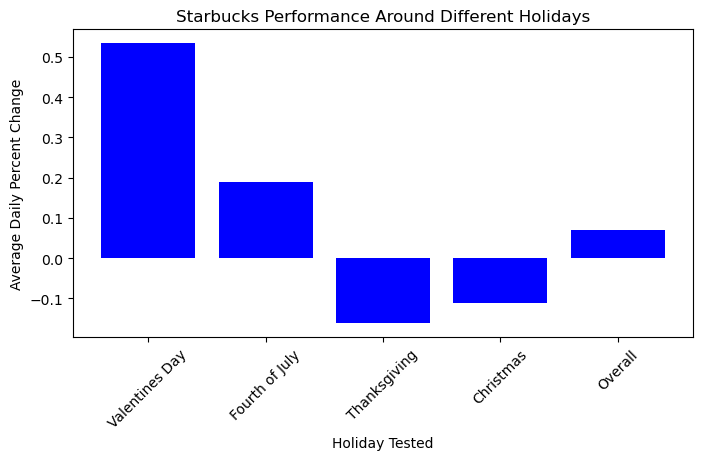

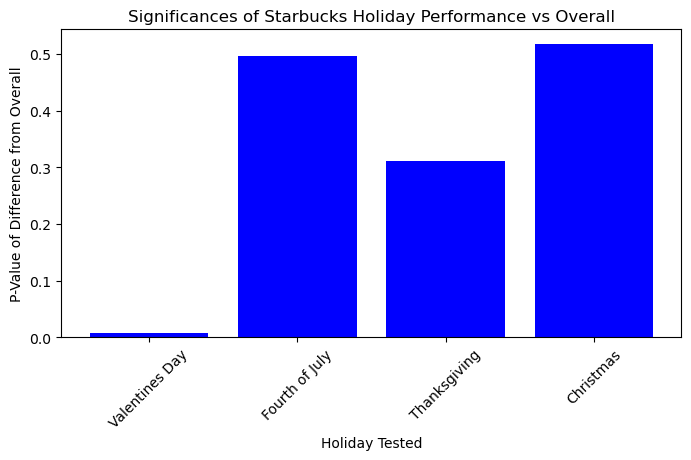

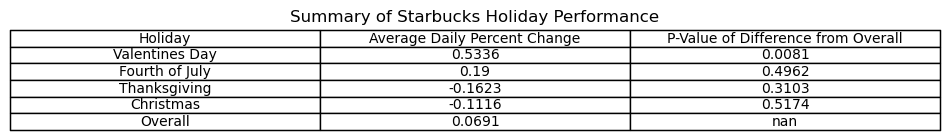

In [25]:
SBUX_summary = pd.DataFrame({'Holiday': ['Valentines Day', 'Fourth of July', 'Thanksgiving', 'Christmas', 'Overall'], 
              'Average Daily Percent Change': [ave_SBUXva, ave_SBUXfj, ave_SBUXth, ave_SBUXch, ave_SBUXoverall], 'P-Value of Difference from Overall':[pvalue_SBUXva, pvalue_SBUXfj, pvalue_SBUXth, pvalue_SBUXch, None]})

#First, bar graph showing the daily performance around holidays is shown
plt.figure(figsize=(8, 4))
plt.bar(SBUX_summary['Holiday'], SBUX_summary['Average Daily Percent Change'], color='b')
plt.title('Starbucks Performance Around Different Holidays')
plt.xlabel('Holiday Tested')
plt.ylabel('Average Daily Percent Change')
plt.xticks(rotation=45)
plt.savefig('SBUX_holidays_pct_chg.jpg', bbox_inches="tight")
plt.show()

#Next, the p-value of the difference from the overall performance is shown
plt.figure(figsize=(8, 4))
plt.bar(SBUX_summary[0:4]['Holiday'], SBUX_summary[0:4]['P-Value of Difference from Overall'], color='b')
plt.title('Significances of Starbucks Holiday Performance vs Overall')
plt.xlabel('Holiday Tested')
plt.ylabel('P-Value of Difference from Overall')
plt.xticks(rotation=45)
plt.savefig('SBUX_holidays_pvalues_chg.jpg', bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 1.3))
plt.title('Summary of Starbucks Holiday Performance')
plt.table(cellText = SBUX_summary.round(4).values, colLabels= SBUX_summary.columns,
              loc='center',cellLoc='center')
plt.xticks([])
plt.yticks([])
plt.savefig('SBUX_holidays_table.jpg', bbox_inches="tight")
plt.show()

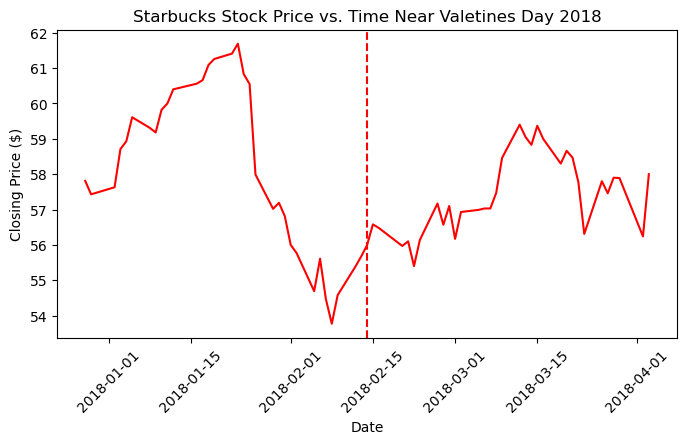

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(SBUX_proc.iloc[va18s-30:va18e+30]['Date'], SBUX_proc.iloc[va18s-30:va18e+30]['Close'], linestyle='-', color='r')
plt.title('Starbucks Stock Price vs. Time Near Valetines Day 2018')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.xticks(rotation=45)
plt.axvline(x = datetime.datetime(2018, 2, 14), color = 'r', linestyle = '--')
plt.savefig('SBUX_prices_va2018.jpg', bbox_inches="tight")
plt.show()